<a href="https://colab.research.google.com/github/parsabarghi/Diabetes-Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes Prediction

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
# show five top of data set
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# did we have null?
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data_corr = df.corr()

<Axes: >

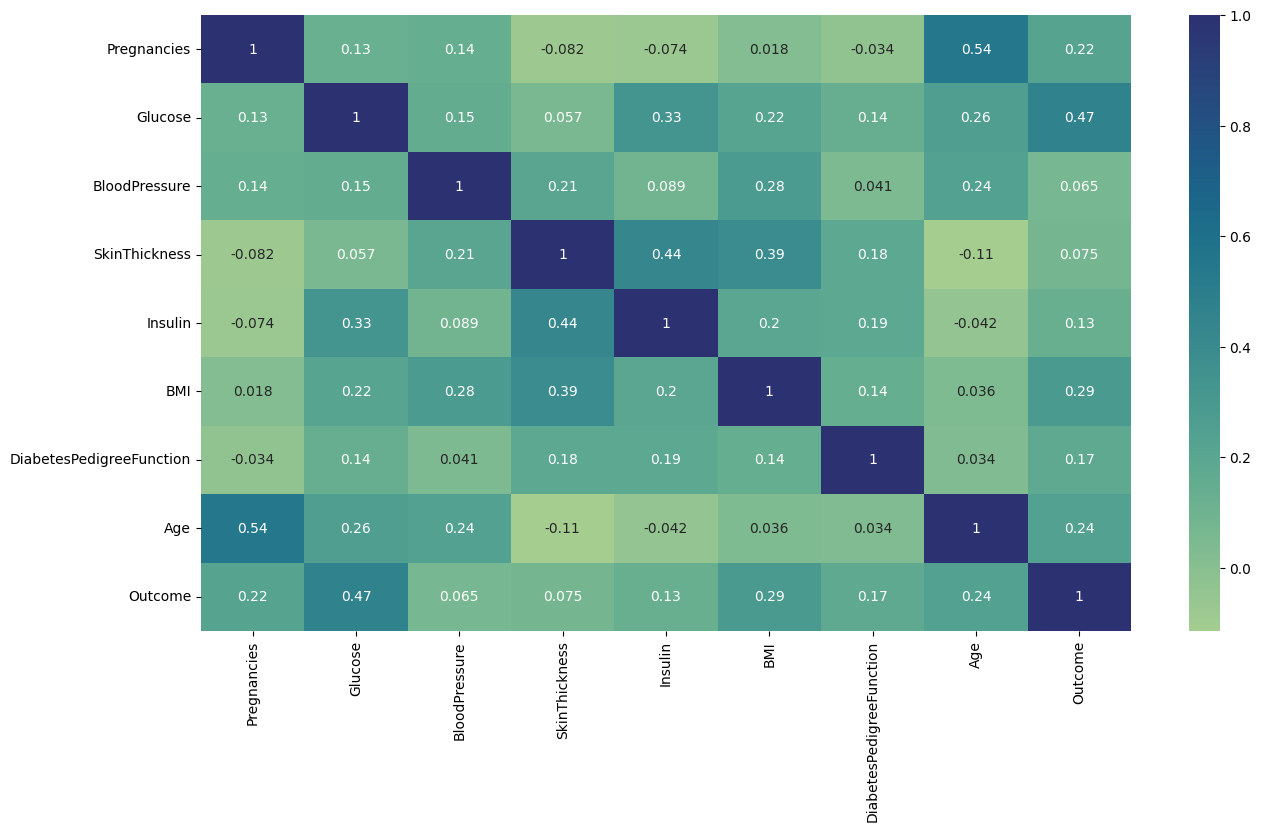

In [ ]:
# correlation
plt.figure(figsize=(15,8))
sns.heatmap(data_corr, annot=True, cmap="crest")

# Calculate Correlation of One Column against All Others

In [ ]:
corr_matrix = df.corr()['Outcome']
corr_matrix

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

# Making New Feature

In [ ]:
df['insulin_bp'] = df['Insulin']/df['BloodPressure']
df['bp_insu'] = df['BloodPressure']/df['Insulin']
df['glu_ins'] = df['Glucose']/df['Insulin']

In [ ]:
corr_matrix = df.corr()['Outcome']
corr_matrix

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
insulin_bp                  0.125357
bp_insu                    -0.217501
glu_ins                    -0.108384
Name: Outcome, dtype: float64

In [ ]:
df.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
insulin_bp                  35
bp_insu                     35
glu_ins                      4
dtype: int64

In [ ]:
df.dropna(axis=1, inplace=True)
# i drop nan value axis because i think they are not useful

## Turn Data To x And y

In [ ]:
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)

In [ ]:
x.shape, y.shape

((768, 8), (768,))

In [ ]:
x = np.array(x)
y = np.array(y)

# Normalize

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Split Data To Train And Test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

array([[-0.54791859, -1.15469351, -3.57259724, ..., -4.06047387,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.27837344,  0.66661825, ..., -0.48135115,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56664949, -1.19450074, ..., -0.41789153,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

## Train Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth=16, n_estimators=300)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=300)

In [ ]:
y_predict_train = model1.predict(x_train)
y_predict_test = model1.predict(x_test)

## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

acc_score_train = accuracy_score(y_train, y_predict_train)
acc_score_test = accuracy_score(y_test, y_predict_test)

acc_score_train*100, acc_score_test*100

(100.0, 75.32467532467533)

# Recall

In [ ]:
rs = recall_score(y_test, y_predict_test)
rs*100

65.45454545454545

# Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_predict_test)

array([[80, 19],
       [19, 36]])

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [2, 4, 8, 16, 32],
    "min_samples_split":[2, 4, 8, 16, 32]
}

grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32],
                         'min_samples_split': [2, 4, 8, 16, 32],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4)